In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms


 **ARIMA OR SARIMAX**

* **Check the data for stationary **

  -**Dickey Fuller test**
  H0 ==> Unit root = 1 ==> Data is not stationary
  H1 ==> Unit root < 1 ==> Data is stationary


In [2]:
df_airline = pd.read_csv("airline_passengers.csv")
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
# check for null
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
#drop null row
df_airline.dropna(axis=0,inplace=True)

In [8]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_airline.count()

Month                      144
Thousands of Passengers    144
dtype: int64

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [11]:
#convert pandas object to datetime
df_airline['Month'] = pd.to_datetime(df_airline.Month)

In [12]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [13]:
#head
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [14]:
df_airline.set_index("Month",inplace=True)

In [15]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [16]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

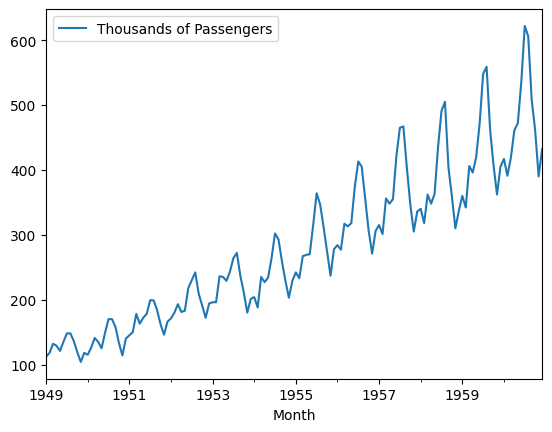

In [18]:
df_airline.plot()
#this is seasonal data --> so not stationary data

In [22]:
# ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result = adfuller(series)
  print("ADF statistics: {}".format(result[0]))
  print("p- value: {}".format(result[1]))

  if result[1]<= 0.05:
    print('reject the null hypothesis, that is data is stationary')
  else:
    print("Accept the null hypothesis, that is data is non-stationary")

In [23]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics: 0.8153688792060498
p- value: 0.991880243437641
Accept the null hypothesis, that is data is non-stationary


In [24]:
# to make it stationary
# Use differencing

df_airline['Pasengers first diff'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [25]:
df_airline.head()

,Thousands of Passengers,Pasengers first diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [27]:
# doing the adf test again
adf_test(df_airline['Pasengers first diff'].dropna())

ADF statistics: -2.8292668241700047
p- value: 0.05421329028382478
Accept the null hypothesis, that is data is non-stationary


In [28]:
# to make it stationary
# Use differencing

df_airline['Pasengers second diff'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(2)

In [29]:
df_airline.head()

,Thousands of Passengers,Pasengers first diff,Pasengers second diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,20.0
1949-04-01,129.0,-3.0,11.0
1949-05-01,121.0,-8.0,-11.0


In [31]:
# doing the adf test again
adf_test(df_airline['Pasengers second diff'].dropna())

ADF statistics: -2.961695135555418
p- value: 0.03862975767698902
reject the null hypothesis, that is data is stationary


In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

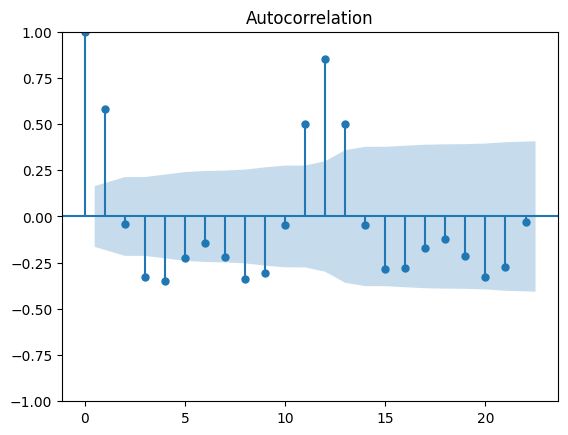

In [33]:
acf = plot_acf(df_airline['Pasengers second diff'].dropna())

In [35]:
df_airline['Pasengers twelve diff'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

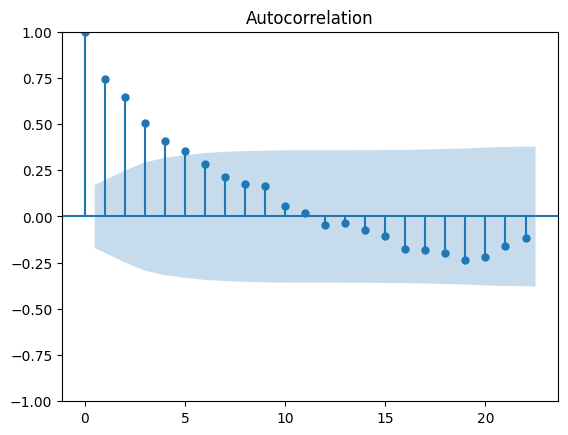

In [37]:
acf_12 = plot_acf(df_airline['Pasengers twelve diff'].dropna())

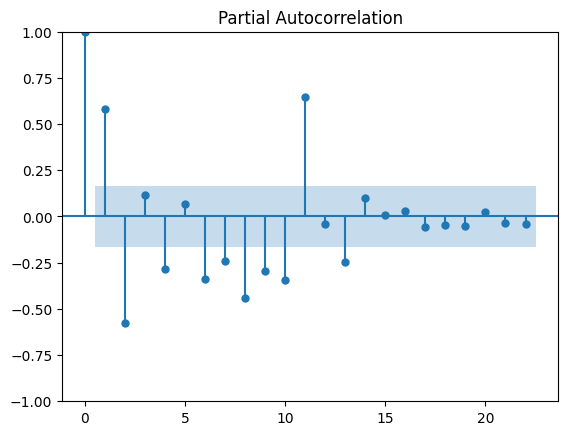

In [34]:
pacf = plot_pacf(df_airline['Pasengers second diff'].dropna())

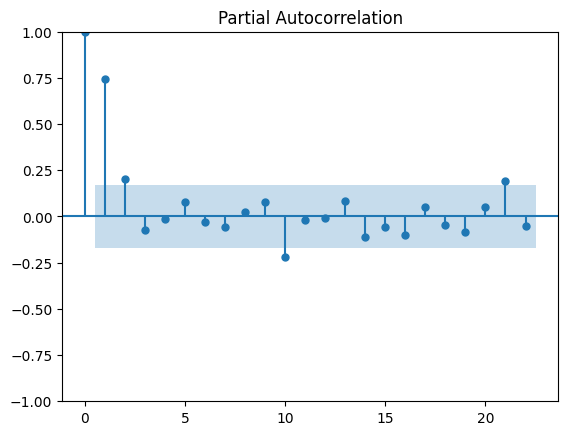

In [38]:
pacf_12 = plot_pacf(df_airline['Pasengers twelve diff'].dropna())

In [39]:
df_airline

,Thousands of Passengers,Pasengers first diff,Pasengers second diff,Pasengers twelve diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,71.0,47.0
1960-09-01,508.0,-98.0,-114.0,45.0
1960-10-01,461.0,-47.0,-145.0,54.0


In [40]:
from datetime import datetime,timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [41]:
train_data = df_airline[:train_dataset_end]

test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [42]:
#prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]



In [44]:
test_data.head()

,Thousands of Passengers,Pasengers first diff,Pasengers second diff,Pasengers twelve diff
Month,,,,
1956-01-01,284.0,6.0,47.0,42.0
1956-02-01,277.0,-7.0,-1.0,44.0
1956-03-01,317.0,40.0,33.0,50.0
1956-04-01,313.0,-4.0,36.0,44.0
1956-05-01,318.0,5.0,1.0,48.0


In [49]:
# create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA


In [50]:
train_data.head()

,Thousands of Passengers,Pasengers first diff,Pasengers second diff,Pasengers twelve diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN


In [52]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
model_ARIMA = model_ARIMA.fit()

In [54]:
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sat, 06 Jul 2024   AIC                            736.477
Time:                             10:47:29   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
# Prediction

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [56]:
pred = model_ARIMA.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [57]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478355
1956-03-01      0.556985
1956-04-01      5.172456
1956-05-01     -0.544234
1956-06-01     25.077917
1956-07-01     46.979713
1956-08-01     58.432466
1956-09-01     22.879031
1956-10-01     -1.734755
1956-11-01    -40.623912
1956-12-01    -33.828197
1957-01-01    -34.840405
1957-02-01    -55.098234
1957-03-01      5.312171
1957-04-01     -2.080465
1957-05-01     -6.157694
1957-06-01     40.783483
1957-07-01     82.680626
1957-08-01     94.147419
1957-09-01     39.889902
1957-10-01     -9.108926
1957-11-01    -66.293791
1957-12-01    -49.323597
1958-01-01    -52.077839
1958-02-01    -73.405852
1958-03-01    -26.404583
1958-04-01    -43.572859
1958-05-01    -39.448082
1958-06-01     21.744314
1958-07-01     80.146583
1958-08-01     97.329454
1958-09-01      1.513662
1958-10-01    -47.089150
1958-11-01   -108.125316
1958-12-01    -89.012377
1959-01-01    -69.205584
1959-02-01    -85.352235
1959-03-01    -22.150992
1959-04-01    -36.7

<Axes: ylabel='Density'>

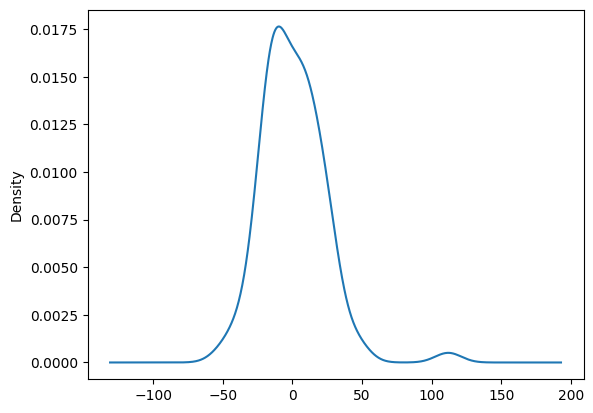

In [58]:
model_ARIMA.resid.plot(kind='kde')

In [59]:
test_data["Predicted_ARIMA"] = pred

<ipython-input-59-ed77f727d465>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_ARIMA"] = pred


<Axes: xlabel='Month'>

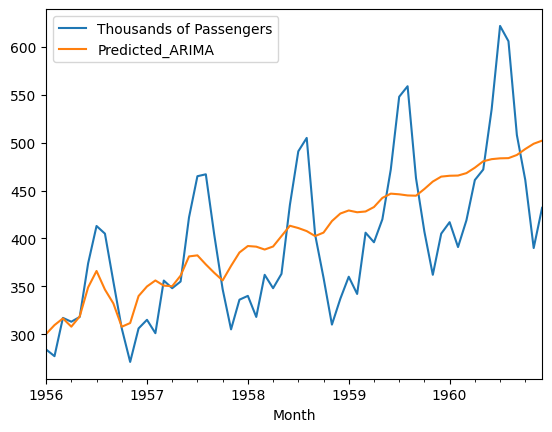

In [60]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

# **SARIMA**

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [62]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_SARIMA_fit = model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 06 Jul 2024   AIC                            548.481
Time:                                     11:06:48   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
test_data.tail()

,Thousands of Passengers,Pasengers first diff,Pasengers second diff,Pasengers twelve diff,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,71.0,47.0,483.883987
1960-09-01,508.0,-98.0,-114.0,45.0,487.184110
1960-10-01,461.0,-47.0,-145.0,54.0,493.432791
1960-11-01,390.0,-71.0,-118.0,28.0,498.930080
1960-12-01,432.0,42.0,-29.0,27.0,502.159832


In [66]:
pred_sarima = model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))

residuals = test_data["Thousands of Passengers"] - pred_sarima

<Axes: xlabel='Month'>

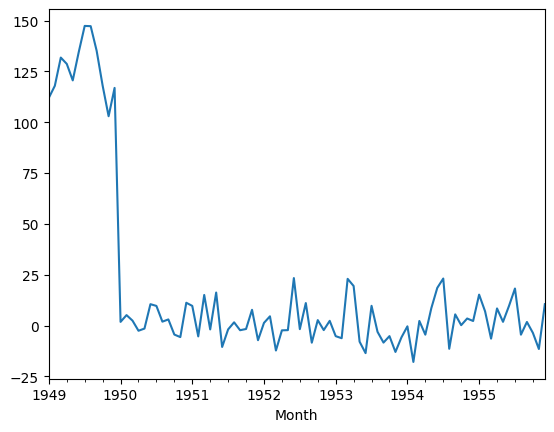

In [67]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

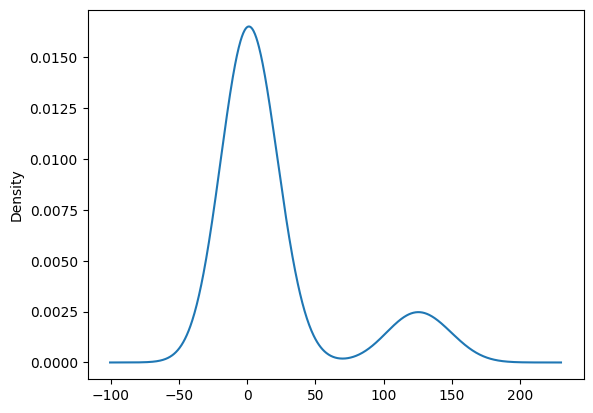

In [68]:
model_SARIMA_fit.resid.plot(kind='kde')

In [69]:
test_data['Predicted_sarima'] = pred_sarima

<ipython-input-69-1414e53932cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_sarima'] = pred_sarima


In [70]:
test_data.head()

,Thousands of Passengers,Pasengers first diff,Pasengers second diff,Pasengers twelve diff,Predicted_ARIMA,Predicted_sarima
Month,,,,,,
1956-01-01,284.0,6.0,47.0,42.0,300.183612,NaN
1956-02-01,277.0,-7.0,-1.0,44.0,309.478355,NaN
1956-03-01,317.0,40.0,33.0,50.0,316.443015,NaN
1956-04-01,313.0,-4.0,36.0,44.0,307.827544,NaN
1956-05-01,318.0,5.0,1.0,48.0,318.544234,NaN


<Axes: xlabel='Month'>

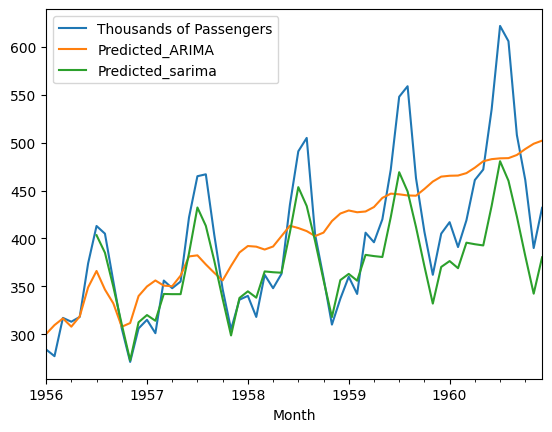

In [71]:
test_data[['Thousands of Passengers','Predicted_ARIMA','Predicted_sarima']].plot()